### 1.IMPORTING THE LIBRARIES AND DEFINING THE PARAMETERS
* A multiple (n=10) potential well structure under forward-biasing of 0.4V. 
* It is a heterojunction: The effective masses are different for the barrier and the wells

In [1]:
from Qvntvs import Qvntvs
import matplotlib.pyplot as plt

particle = Qvntvs(potential_barrier_electron=10,
                            potential_barrier_hole=10,
                            m_e_barrier=2, 
                            m_e_well = 1,
                            m_h_barrier=3, 
                            m_h_well=2, 
                            biasing_voltage=0.4,
                            well_width_nm=2, 
                            barrier_width_nm=2, 
                            n_intervals=1000,
                            n_wells=10)

### 2.DEFINING THE POTENTIAL WELL STRUCTURE
- A Multiple Well Structure with n=10 for both electrons and holes.

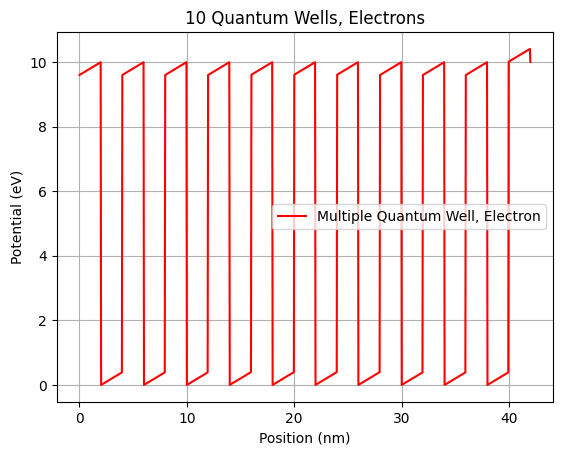

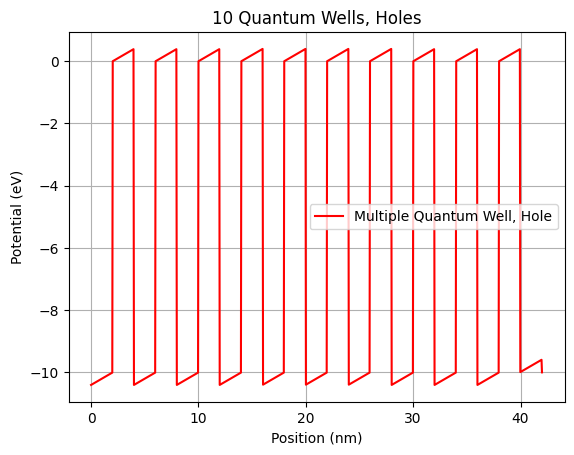

In [2]:
V_general_electron = particle.triangular_potential_profile(electron=True, barrier_bending=True, plot=True)
V_general_hole = particle.triangular_potential_profile(electron=False,barrier_bending=True, plot=True)

### 3.EFFECTIVE MASS PROFILES
- Since it is a heterostructure, the effective masses are different.

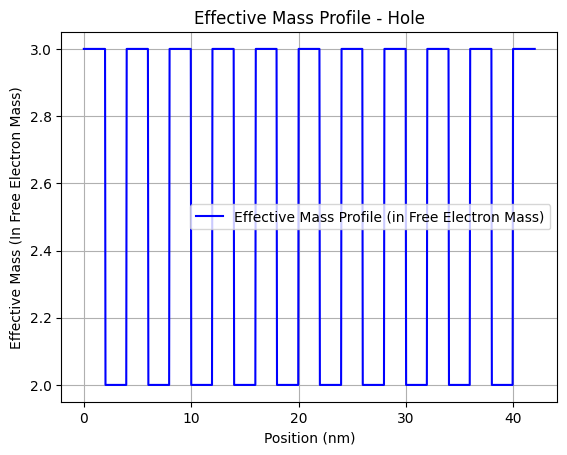

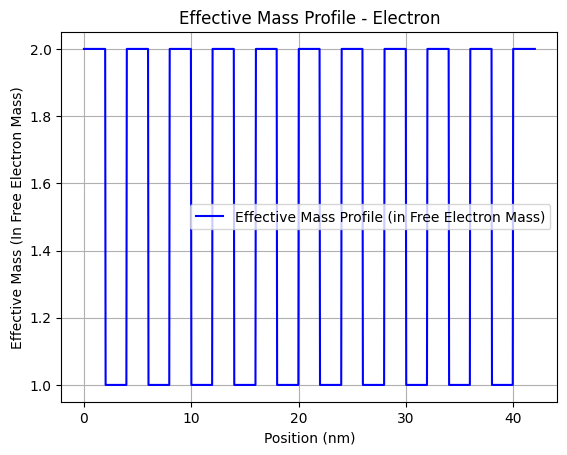

In [3]:
m_general_hole = particle.effective_mass_profile(electron=False, plot=True)
m_general_electron = particle.effective_mass_profile(electron=True, plot=True)

### 4. HAMILTONIAN AND PLOTTING THE ENERGY LEVELS AND WAVEFUNCTIONS
- Multiple wells cause band-forming or level-splitting.
- Calculating the first 11 energy levels and their wavefunctions.

  Energy Level 1: 0.250 eV
  Energy Level 2: 0.250 eV
  Energy Level 3: 0.250 eV
  Energy Level 4: 0.250 eV
  Energy Level 5: 0.251 eV
  Energy Level 6: 0.251 eV
  Energy Level 7: 0.251 eV
  Energy Level 8: 0.251 eV
  Energy Level 9: 0.251 eV
  Energy Level 10: 0.251 eV
  Energy Level 11: 0.515 eV


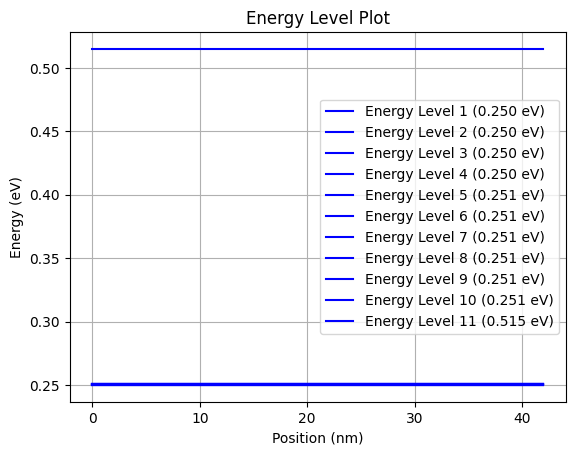

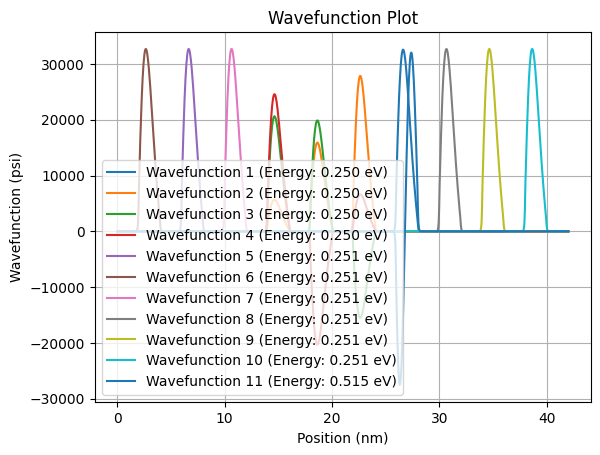

  Energy Level 1: 0.197 eV
  Energy Level 2: 0.197 eV
  Energy Level 3: 0.197 eV
  Energy Level 4: 0.197 eV
  Energy Level 5: 0.189 eV
  Energy Level 6: 0.189 eV
  Energy Level 7: 0.189 eV
  Energy Level 8: 0.189 eV
  Energy Level 9: 0.189 eV
  Energy Level 10: 0.189 eV
  Energy Level 11: 0.025 eV


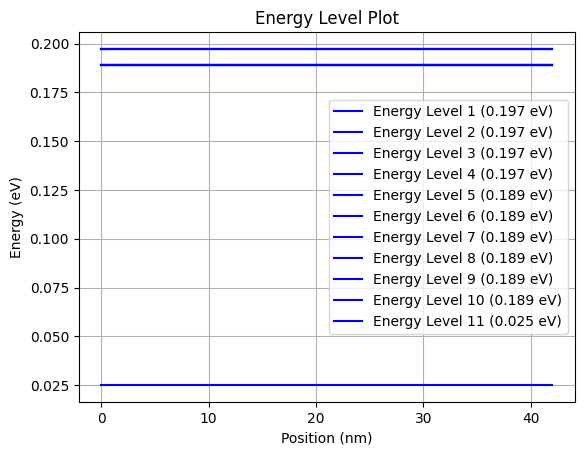

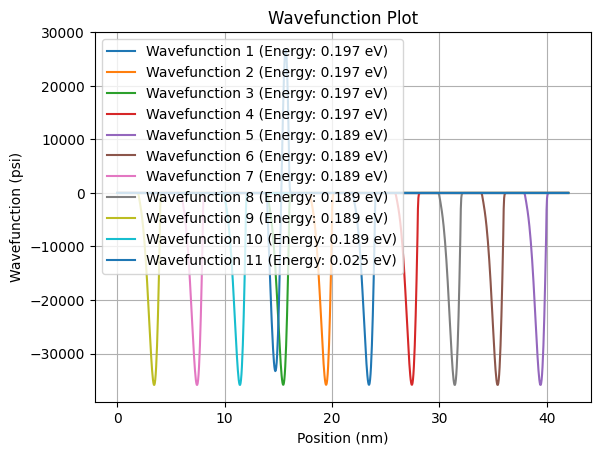

In [7]:
inv_mass_hole = particle.inverse_mass_profile(m_general_hole, electron=False, plot=False)
inv_mass_electron = particle.inverse_mass_profile(m_general_electron, electron=True, plot=False)

H_electron = particle.hamiltonian_matrix(V_general_electron, inv_mass=inv_mass_electron, electron=True, plot=False)
H_hole = particle.hamiltonian_matrix(V_general_hole, inv_mass=inv_mass_hole, electron=False, plot=False)

energy_levels_electron, wave_functions_electron = particle.eigen_equation(H_electron, electron=True, plot=True, n_levels=11)
energy_levels_hole, wave_functions_hole = particle.eigen_equation(H_hole, electron=False, plot=True, n_levels=11)

### 5.RECOMBINATION PROBABILITES AND THE SPATIAL DISTRIBUTION OF RECOMBINATION

Recombination Probability (Ground States): 3.171e-04


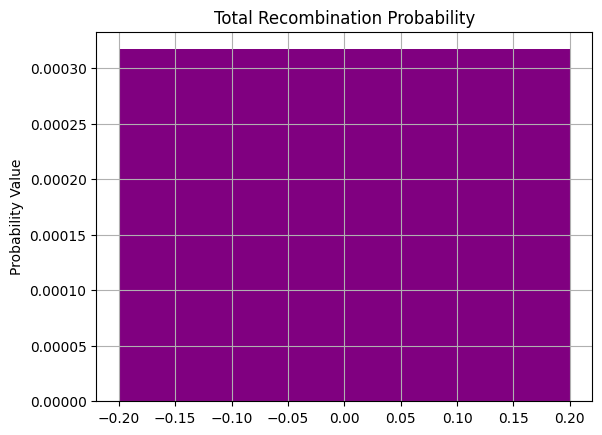

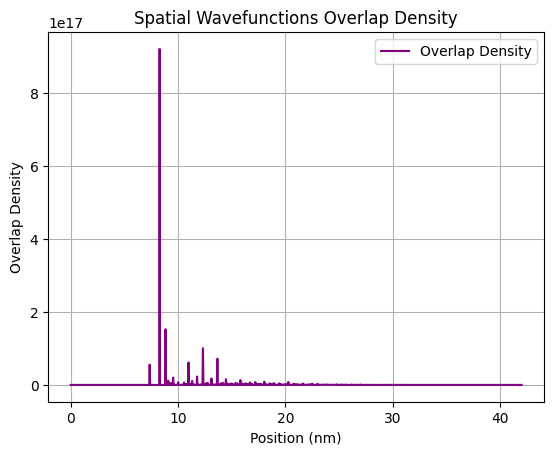

In [8]:
rec_prob, rec_density = particle.recombination_probability(wave_functions_electron, wave_functions_hole, plot=True)